# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

 I first checked the Price variable by looking at its datatype and saw that it was already stored as an int64, meaning pandas recognized it as a numeric variable when the dataset was loaded. The hint mentioned that prices over 999 might include commas (like “1,112”), which can sometimes cause a column to be read as text instead of numbers. However, since this column was already numeric, no extra cleaning was needed. I then checked for missing values using df["Price"].isna().sum() and found that there were 0 missing values. This shows that the Price variable was already clean and ready to use for analysis.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

After cleaning the subject_injury variable, I cross-tabulated it with force_type to look for patterns. The table shows that missing values occur most often for common types of force such as bodily force, chemical irritants, and tasers. In contrast, force types like police K9 bites have fewer missing values and a higher number of reported injuries. This suggests that injuries may be more consistently recorded for more severe, while injuries are less documented for more common uses of force.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

I inspected the Overall Survival Status variable and saw that it was stored as text values like "1:DECEASED" and "0:LIVING" instead of numeric values. I extracted the first number and converted it to an integer. Because the dataset used 1 for deceased and 0 for living, I flipped the values so the dummy variable would be 0 for deceased and 1 for living, as required. After creating the new variable, I checked it and confirmed there were 0 missing values.

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

There were 8,323 missing values in Review Scores Rating. I created a new column and filled the missing values with the median rating. This might impact the results because it makes many listings look similar and could hide real differences, especially if the ratings are missing for a reason like the listing being new.

In [1]:
! git clone https://github.com/pateld07/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 27 (delta 5), reused 4 (delta 4), pack-reused 17 (from 1)
Receiving objects: 100% (27/27), 30.33 KiB | 15.17 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Download complete
Extracting data files...
Data extracted


In [15]:
import pandas as pd

df = pd.read_csv("./data/airbnb_NYC.csv", encoding="latin1")

df["Price"].dtype
df["Price"].head(10)


,Price
0,145
1,37
2,28
3,199
4,549
5,149
6,250
7,90
8,270
9,290


In [16]:
df["Price"].max()

'999'

In [19]:
missing_price = df["Price"].isna().sum()
missing_price

np.int64(0)

In [14]:
df["Price"].dtype

dtype('int64')

In [22]:
import pandas as pd

df = pd.read_csv("./data/mn_police_use_of_force.csv", encoding="latin1")

In [26]:
df["subject_injury"].value_counts(dropna=False)
df["subject_injury"].isna().mean()

df["subject_injury"] = df["subject_injury"].fillna("Missing")

pd.crosstab(df["force_type"], df["subject_injury"])

subject_injury,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


In [33]:
df = pd.read_csv("./data/metabric.csv")

In [39]:
df["Overall Survival Status"].value_counts()

status_code = df["Overall Survival Status"].str[0].astype(int)

df["survival_dummy"] = 1 - status_code

df["survival_dummy"].value_counts()
df["survival_dummy"].isna().sum()

np.int64(0)

In [46]:
import pandas as pd

df = pd.read_csv("./data/airbnb_NYC.csv", encoding="latin1")

In [50]:
df["Review Scores Rating"].isna().sum()

np.int64(8323)

In [52]:
df["Review Scores Rating"].isna().sum()

median_rating = df["Review Scores Rating"].median()

df["Review Scores Rating Imputed"] = df["Review Scores Rating"].fillna(median_rating)

df["Review Scores Rating Imputed"].isna().sum()

np.int64(0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

An observation is a single recorded shark attack. Each row represents one attack event with details such as the year, victim’s age, type of attack, and whether it was fatal. Thinking of each row as one attack helps guide cleaning because we want to keep rows that contain meaningful information about an event while removing empty columns that do not add useful data.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

Shark attacks seem to be increasing over time. There were fewer attacks in earlier years, but the numbers are higher in more recent years. The numbers go up and down some years, but overall they are going up. The big drop at the end is probably because the most recent year does not have all the data yet, not because attacks suddenly decreased.

5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
0.738829185520362 of attacks are unprovoked, so 74%
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Unprovoked attacks are more likely to be fatal than provoked attacks. About 24% of unprovoked attacks were fatal, while only about 3% of provoked attacks were fatal. This may be because unprovoked attacks happen suddenly, giving the person less time to react.

In [2]:
import pandas as pd

df = pd.read_excel("GSAF5.xls")

In [3]:
df.isna().sum()

,0
Date,0
Year,2
Type,18
Country,50
State,487
Location,567
Activity,583
Name,218
Sex,578
Age,2994


In [4]:
df = df.dropna(axis=1, how="all")

In [5]:
df["Year"].head()
df["Year"].dtype

dtype('float64')

In [6]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

In [7]:
df = df.dropna(subset=["Year"])

In [8]:
df["Year"] = df["Year"].astype(int)

In [9]:
df["Year"].min(), df["Year"].max()

(0, 2026)

<Axes: xlabel='Year'>

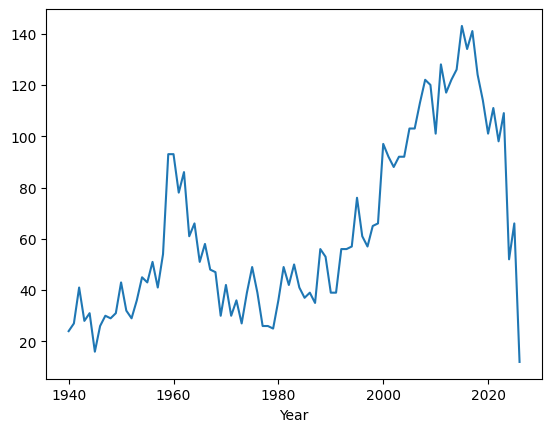

In [13]:
recent_attacks = df[df["Year"] >= 1940]
recent_attacks["Year"].value_counts().sort_index().plot()

<Axes: >

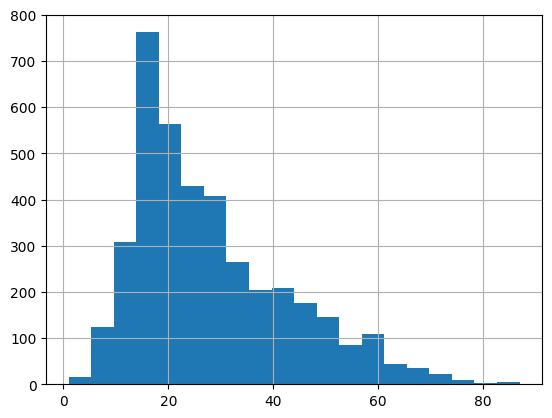

In [16]:
df["Age"].head()
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"].hist(bins=20)

In [39]:
df["Type"] = df["Type"].replace(
    ["Boat", "Sea Disaster", "Questionable", "Invalid"],
    "Unknown"
)
df["Type"] = df["Type"].fillna("Unknown")

df["Type_clean"].value_counts()

,count
Type_clean,
Unprovoked,5225
Unknown,1203
Provoked,644


In [42]:
prop_unprovoked = (df["Type_clean"] == "Unprovoked").mean()
prop_unprovoked

np.float64(0.738829185520362)

In [32]:
df["Fatal Y/N"] = df["Fatal Y/N"].replace(
    ["NQ", "Y X 2"],
    "Unknown"
)
df["Fatal Y/N"].value_counts()

,count
Fatal Y/N,
N,4942
Y,1488
Unknown,642


In [45]:
pd.crosstab(df["Type_clean"], df["Fatal Y/N"], normalize="index")

Fatal Y/N,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.373234,0.460515,0.166251
Unprovoked,0.742392,0.015120,0.242488


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  The paper explains how to organize data so it is easier to analyze. It focuses on “tidy data,” which means structuring datasets so each variable is a column and each observation is a row.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The tidy data standard gives a consistent way to organize data so cleaning is easier and analysts can spend more time studying the data instead of fixing it.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence means tidy datasets all follow the same structure, but messy datasets can be disorganized in many different ways, which makes them harder to clean. The second senstence means it is usually easy to identify variables and observations in one dataset, but it is hard to create a single definition that works for every dataset because data can be organized differently.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values are the individual pieces of data like numbers or words. Variables are the values that measure the same thing. Observations are all the values collected about one unit, such as one person or event.

  5. How is "Tidy Data" defined in section 2.3?

  A dataset is tidy when each variable is a column, each observation is a row, each type of observation has its own table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  1.Column headers are values instead of variable names
  2.Multiple variables are stored in one column
  3.Variables are stored in both rows and columns
  4.Multiple types of observations are in one table
  5.One type of observation is split across multiple tables

Table 4 is messy because the column headers represent income values instead of variable names. Melting means turning columns into rows so each column represents a variable and each row represents one observation

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because variables appear in both rows and columns, and one column stores variable names instead of values.
Table 12 is tidy because each column is a variable and each row represents one observation, making the data easier to analyze.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?